# Project: 4     Web Scraping Job Postings

Authors: Jovy Postrado

---

This project consists of testing the three major skills: collecting data by scraping a website, using natural language processing, and building a binary classifier.

I collected salary information on data science jobs in the Indeed Australia only. Then using the location, title, and summary of the job I attempted to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings do not come with salary information, being to able extrapolate or predict the expected salaries from other listings can be useful.

I also determined if each job’s salary is high and low based on average salary from payscale.com. Normally, regression could be used for a task like this; however, since there is a fair amount of natural variance in job salaries, I approached this as a classification problem and used a random forest classifier. 

The first part of the project was focused on scraping Indeed.com.au. The latter part of the project was focused on using natural language processing and building models using job postings with salary information to predict salaries.


## Conclusion

Based on the data i have, Title and Location effects the salary. Business and Brisbane were the strongest predictors of salary. The model had average precision — approximately 74% accuracy, where random guesses could have achieved 59% — which may have been caused by variability in the source salary data.


## Scraping job posts from Indeed.com.au

---
I scraped those data-related job postings like data scientist, data analyst, research scientist, business intelligence within Australia only.


My Indeed scraper is included on my folder namely IndeedScraper.py. Following are some features of the scraper I made.


- You need to search for the job and location you wanted then copy the address and paste it to the main_page.
- You also need to change the name of the csv file which is in the bottom and the path of the chromedriver.
- And because this is a py file it needs to be run on Spyder or any software that can run any py files.
- Make sure to clear all the history and cookies before starting as it helps to prevent loading the source page of each jobs posted in Indeed.
- It will starts loading the main_page at the chromedriver and automatically clicks every jobs
- A new tab will open and when it loads it will automatically scrape it then close itself.
- After scraping the jobs in the results page, it will go to the next page until the last pages.
- It will load a status which page and how many jobs and minutes it finished.
- I put alot of exceptions for all the possible error that it will encounter like Failed to scrape for the summary

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Cleaning of the raw data happened at Cleaning_data.ipynb included in this folder

Here's the raw data that the scraper made.

In [58]:
raw_data = pd.read_csv('Indeed_Data Science.csv')
raw_data.iloc[100:115,:]

,Unnamed: 0,Jobs,Companies,Locations,Salaries,Summaries,Link_Page
100,100,Industry Cloud Architect,Vlocity,Sydney NSW,Nothing Found,Company Description ------------------- Vlocit...,https://au.indeed.com/viewjob?jk=5f119af2536d9...
101,101,Product Manager - Ad Serving & Data,Leadbolt,Bondi Junction NSW,Nothing Found,Are you a Product Manager working within the M...,https://au.indeed.com/viewjob?jk=90dbd2afe351b...
102,102,"Measurement Lead, ANZ",Facebook,Sydney NSW,Nothing Found,"(Sydney, Australia - Melbourne, Australia) Fac...",https://au.indeed.com/viewjob?jk=02abeee531dcd...
103,103,"TITUS Professional Services Consultant, APAC",Titus,Sydney NSW,Nothing Found,"TITUS is currently seeking an enthusiastic, re...",https://au.indeed.com/viewjob?jk=82f392e962fe1...
104,104,Product Manager - Industrial Data Loggers,Thermo Fisher Scientific,Scoresby VIC,Nothing Found,Job Description Newly created role Create key ...,https://au.indeed.com/viewjob?jk=95ff6cb727e5d...
105,105,Senior Technical Specialist,Tasmanian Government,Hobart TAS,"$87,955 - $99,599 a year",Award/Classification: Tasmanian State Service ...,https://au.indeed.com/viewjob?jk=b64d9f39c9bda...
106,106,Clinical Operations Manager,PRA International,Australia,Nothing Found,The Manager of Clinical Operations is responsi...,https://au.indeed.com/viewjob?jk=04908d5e44f9b...
107,107,Senior Professional Solution Architect,CSC,Adelaide SA,Nothing Found,DXC Technology (NYSE: DXC) is the world’s lead...,https://au.indeed.com/viewjob?jk=2aa12f1013851...
108,108,Directory Solutions Architect,Ping Identity,Sydney NSW,Nothing Found,"At Ping Identity, we're changing the way peopl...",https://au.indeed.com/viewjob?jk=3d6d05a7eacf2...
109,109,Scrum Master,Accenture,Melbourne VIC,Nothing Found,Join Accenture and help transform leading orga...,https://au.indeed.com/viewjob?jk=ecf90f577bc8b...


In [66]:
raw_data.iloc[100:101,:].Summaries.values

array([ "Company Description ------------------- Vlocity is a fast-growing enterprise applications company focused on bringing industry-specific business processes to the cloud. With 300 employees around the world and customers on six continents, Vlocity has been the fastest-growing independent software vendor on the Salesforce platform for two years running. Vlocity is currently shipping version 15 of its application suite, and has raised over $100MM in capital from investors including Salesforce.com, Accenture and Sutter Hill Ventures. Vlocity develops software to help communications, media & energy providers, insurance carriers and government agencies digitally engage customers through their channels and devices of choice. We serve dozens of the world’s Fortune 5000 companies including Sky Italia, Telecom Italia, TELUS, 3, Telecom Argentina, Cellcom, New York Life, Farmers Insurance, Harvard Pilgrim, and Anthem. Our solutions run on our customers’ web sites, in their contact centers

As the scraper get the Link pages for reference only, I dont need this to include in the prediction so I drop it. I also include all the csv files that i scraped from Indeed

In [3]:
files = ['Indeed_Data Science1.csv','Indeed_Data Science3.csv','Indeed_Data Scientist.csv','Indeed_Data Engineer.csv',
        'Indeed_Business Analyst.csv','Indeed_Business Analyst1.csv','Indeed_Data Analyst.csv','Indeed_Machine Learning.csv']

Overall data are (8270, 5)

After changing only those who have Salaries only  data drops to (1893, 5)

Also cleaned those commas and $ sign in salary

The cleaning took some time as duplicated() really didnt do the job well. Mostly of them i manually drop by keeping up at the value_counts of each columns


I decided to convert all those hour, days, weekly and monthly to yearly rate salary based on https://www.paycalculator.com.au

for row in range(len(salaries)):
    value = salaries.iloc[row,3]

    if value.find('a day') != -1:
        newvalue = value.replace('a day','')
        newvalue = newvalue.replace(' ','')
        if value.find('-') != -1:
            values = newvalue.split('-')
            newvalue = (float(values[0])+float(values[1]))/2
        newvalue = (float(newvalue) * 5) * 250
        salaries.iloc[row,3] = newvalue
    if value.find('a week') != -1:
        newvalue = value.replace('a week','')
        newvalue = newvalue.replace(' ','')
        if value.find('-') != -1:
            values = newvalue.split('-')
            newvalue = (float(values[0])+float(values[1]))/2
        newvalue = float(newvalue) * 52
        salaries.iloc[row,3] = newvalue
    if value.find('a year') != -1:
        newvalue = value.replace('a year','')
        newvalue = newvalue.replace(' ','')
        if value.find('-') != -1:
            values = newvalue.split('-')
            newvalue = (float(values[0])+float(values[1]))/2
        salaries.iloc[row,3] = float(newvalue)
    if value.find('an hour') != -1:
        newvalue = value.replace('an hour','')
        newvalue = newvalue.replace(' ','')
        if value.find('-') != -1:
            values = newvalue.split('-')
            newvalue = (float(values[0])+float(values[1]))/2
        newvalue = ((float(newvalue) * 8) * 5)*250
        salaries.iloc[row,3] = newvalue
    if value.find('a month') != -1:
        newvalue = value.replace('a month','')
        newvalue = newvalue.replace(' ','')
        if value.find('-') != -1:
            values = newvalue.split('-')
            newvalue = (float(values[0])+float(values[1]))/2
        newvalue = float(newvalue) * 12
        salaries.iloc[row,3] = newvalue

After converting salary to float I saved this as Cleaned.csv

### Cleaning of city data happened at City.ipynb included in this folder

I decided to based my prediction to high and low salary based on https://www.payscale.com/research/AU/Job=Data_Scientist%2C_IT/Salary that Data Scientist have average of AU$92,667/year

In [2]:
df = pd.read_csv('Cleaned_City.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Locations',axis=1,inplace=True)
df.head()

,Jobs,Companies,Salaries,Summaries,high_salary,City
0,"Student - Data Officer, Community Planning",Moonee Valley City Council,339000.0,"Student Data Officer, Community Planning Refer...",1,"Melbourne , VIC"
1,Solutions Architect,Pythian,165000.0,Job Summary Why Pythian? Pythian is a global I...,1,"Sydney , NSW"
2,"Manager, Insights",State Trustees Limited,116647.0,Located at our Head Office in Footscray (10 mi...,1,"Melbourne , VIC"
3,PhD Scholarship – Big Data Analytics for Oil D...,Swinburne University of Technology,25849.0,"Faculty of Science, Engineering and Technology...",0,"Melbourne , VIC"
4,STRUCTURAL TECHNOLOGY SPECIALIST,VicRoads,118388.5,About VicRoads Victoria has embarked on a once...,1,"Kew East , VIC"


In [4]:
median_salary = 92667
median_salary

92667

### City random forest

In [5]:
city_dummies = pd.get_dummies(df.City)

X_city = city_dummies
y_city = df.high_salary

X_train, X_test, y_train, y_test = train_test_split(X_city, y_city, test_size=0.3, random_state=90)

rfc = RandomForestClassifier(n_estimators=300, random_state=90)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X_city, y_city, cv=10, n_jobs=-1)
print("Cross Validation Score:\t{:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.699
Cross Validation Score:	0.661 ± 0.024


In [6]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_city.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
for i in X_city.columns:
    feature_medians.append(np.median(df[df.City == i].Salaries))

feature_importances['median_salary'] = feature_medians
feature_importances['over_or_under'] = [1 if i > median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(15)

,feature,importance,median_salary,over_or_under
84,"Sydney , NSW",0.113798,120000.0,1
37,"Hobart , TAS",0.041932,85500.0,0
42,"Mackay , QLD",0.037751,66500.0,0
70,"Parramatta , NSW",0.027646,700000.0,1
5,"Ballarat , VIC",0.026841,80000.0,0
53,"Milton , QLD",0.026804,88750.0,0
30,"Edgecliff , NSW",0.023790,61250.0,0
22,"Clayton , VIC",0.022801,71789.5,0
69,"Parkville , VIC",0.021691,81489.0,0
0,"Adelaide , SA",0.017540,82933.0,0


In [7]:
feat_city = feature_importances.sort_values('importance', ascending=False).head(15)
feat_city.drop('median_salary',axis=1,inplace=True)
feat_city.drop('over_or_under',axis=1,inplace=True)

In [8]:
feat_city = feat_city.set_index('feature')

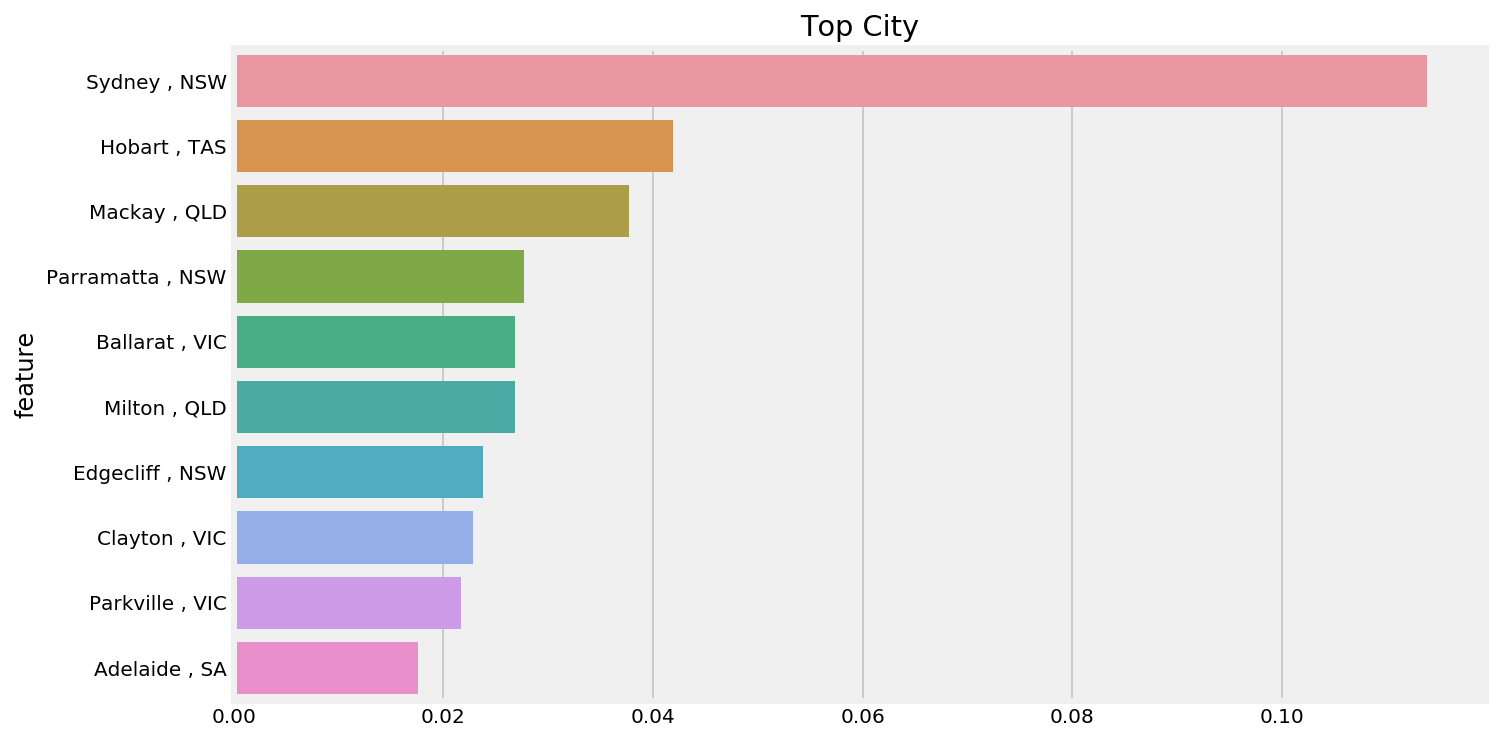

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(data = feat_city.iloc[0:10].sort_values(by = 'importance', ascending = False).T, orient='h')
plt.title("Top City")
plt.show()

### Summary Count Vectorizer

In [10]:
salaries_w_desc = df[df.Summaries.notnull()]

X_summ = salaries_w_desc.Summaries
y_summ = salaries_w_desc.high_salary

except_words = ['ago','days','apply','work','working','like','ing','new','job','save','australia','position',
               'strong','role','includ','original','day','requirements','30','jobs','au','view','000','00','fixed',
               'description','centre','required','location','type','range','time','salary','arments','plus','15',
               'related','successful']

for e in except_words:
    X_summ = X_summ.str.replace(e,'')
    
cv = CountVectorizer(stop_words="english")
cv.fit(X_summ)

X_summ_trans = pd.DataFrame(cv.transform(X_summ).todense(), columns=cv.get_feature_names())

X_train, X_test, y_train, y_test = train_test_split(np.asmatrix(X_summ_trans), y_summ, test_size=0.3,
                                                    random_state=59, stratify=y_summ)

word_counts = X_summ_trans.sum(axis=0)
word_counts.sort_values(ascending = False).head(10)

data          1884
business      1828
experience    1560
nsw           1553
sydney        1457
research      1205
analyst       1172
skills         853
team           841
engineer       771
dtype: int64

In [11]:
rfc = RandomForestClassifier(200, random_state=59)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X_summ_trans.as_matrix(), y_summ.as_matrix(), cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.735
Cross Validation Score: 0.733 ± 0.047


In [ ]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_summ_trans.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
feature_means = []
for i in X_summ_trans.columns:
    feature_medians.append(np.median(salaries_w_desc[salaries_w_desc.Summaries.str.lower().str.contains(i)].Salaries))
    feature_means.append(np.mean(salaries_w_desc[salaries_w_desc.Summaries.str.lower().str.contains(i)].Salaries))


feature_importances['median_salary'] = feature_medians
feature_importances['mean_salary'] = feature_means
feature_importances['over_or_under'] = [1 if i > median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(20)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Title Count Random Forest

In [12]:
salaries_w_desc = df[df.Jobs.notnull()]

X_title = salaries_w_desc.Jobs
y_title = salaries_w_desc.high_salary

except_words = ['bi','aps6','pricing']

for e in except_words:
    X_title = X_title.str.replace(e,'')
    
X_title_trans = pd.DataFrame(cv.transform(X_title).todense(), columns=cv.get_feature_names())

X_train, X_test, y_train, y_test = train_test_split(X_title_trans, y_title, test_size=0.3, random_state=59)

rfc = RandomForestClassifier(200, random_state=59)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X_title_trans.as_matrix(), y_title.as_matrix(), cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.708
Cross Validation Score: 0.712 ± 0.059


In [19]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_title_trans.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
feature_means = []
for i in X_title_trans.columns:
    feature_medians.append(np.median(salaries_w_desc[salaries_w_desc.Jobs.str.lower().str.contains(i)].Salaries))
    feature_means.append(np.mean(salaries_w_desc[salaries_w_desc.Jobs.str.lower().str.contains(i)].Salaries))


feature_importances['median_salary'] = feature_medians
feature_importances['mean_salary'] = feature_means
feature_importances['over_or_under'] = [1 if i > median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(10)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature,importance,median_salary,mean_salary,over_or_under
1847,business,0.028677,122500.0,377684.677515,1
7831,senior,0.025504,125000.0,254876.297980,1
1140,analyst,0.024007,109037.0,295511.345201,1
2821,data,0.020447,118565.5,256014.017241,1
6213,officer,0.017683,86829.0,133085.396552,0
7442,research,0.015743,91590.0,113160.050725,0
4242,graduate,0.015206,60000.0,63928.571429,0
5097,junior,0.013382,85500.0,128394.736842,0
4158,geospatial,0.012262,85500.0,79662.200000,0
1361,assistant,0.011394,75025.0,124492.333333,0


In [24]:
feat_title = feature_importances.sort_values('importance', ascending=False).head(15)
feat_title.drop('median_salary',axis=1,inplace=True)
feat_title.drop('mean_salary',axis=1,inplace=True)
feat_title.drop('over_or_under',axis=1,inplace=True)
feat_title = feat_title.set_index('feature')

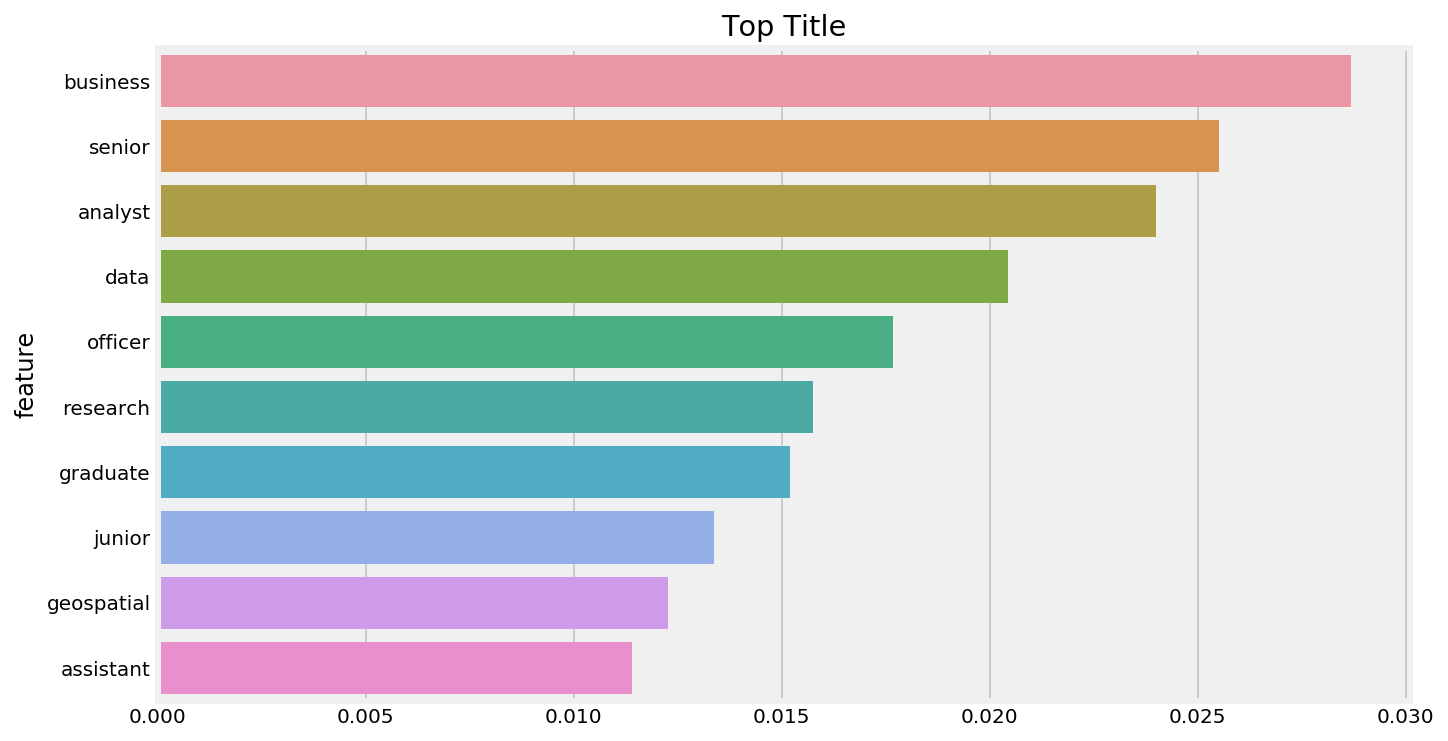

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data = feat_title.iloc[0:10].sort_values(by = 'importance', ascending = False).T, orient='h')
plt.title("Top Title")
plt.show()

### Combining Title CV, Summary CV, and Location

In [26]:
salaries_w_desc = df[df.Summaries.notnull()].reset_index()
city_dummies = pd.get_dummies(salaries_w_desc.City)

X = pd.concat([city_dummies, X_title_trans, X_summ_trans], axis=1)
y = salaries_w_desc.high_salary

In [17]:
y.to_csv('y.csv', header= True,index=False)

In [27]:
print(X.shape)
print(y.shape)

(728, 19028)
(728,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y, test_size=0.3, random_state=68, stratify=y)

In [29]:
rfc = RandomForestClassifier(500, random_state=59)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

s = cross_val_score(rfc, X.as_matrix(), y.as_matrix(), cv=10, n_jobs=-1)
print("Cross Validation Score: {:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))

Accuracy Score: 0.74
Cross Validation Score: 0.728 ± 0.039


In [30]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns).reset_index()
feature_importances.columns = ['feature', 'importance']

feature_medians = []
for i in city_dummies.columns:
    feature_medians.append(np.median(df[df.City == i].Salaries))
for i in X_title_trans.columns:
    feature_medians.append(np.median(salaries_w_desc[salaries_w_desc.Jobs.str.lower().str.contains(i)].Salaries))
for i in X_summ_trans.columns:
    feature_medians.append(np.median(salaries_w_desc[salaries_w_desc.Summaries.str.lower().str.contains(i)].Salaries))

feature_importances['median_salary'] = feature_medians
feature_importances['over_or_under'] = [1 if i > median_salary else 0 for i in feature_importances.median_salary]

feature_importances.sort_values('importance', ascending=False).head(10)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature,importance,median_salary,over_or_under
1941,business,0.012694,122500.00,1
7,"Brisbane , QLD",0.009812,101982.50,1
1234,analyst,0.008860,109037.00,1
84,"Sydney , NSW",0.008704,120000.00,1
7925,senior,0.008088,125000.00,1
2915,data,0.006354,118565.50,1
47,"Melbourne , VIC",0.006107,100000.00,1
8607,systems,0.005764,101002.25,1
6307,officer,0.005502,86829.00,0
4336,graduate,0.004677,60000.00,0


In [35]:
features = feature_importances.sort_values('importance', ascending=False).head(10)

In [36]:
features = features.set_index('feature')
features.sort_values('importance', ascending=False)

,importance,median_salary,over_or_under
feature,,,
business,0.012694,122500.00,1
"Brisbane , QLD",0.009812,101982.50,1
analyst,0.008860,109037.00,1
"Sydney , NSW",0.008704,120000.00,1
senior,0.008088,125000.00,1
data,0.006354,118565.50,1
"Melbourne , VIC",0.006107,100000.00,1
systems,0.005764,101002.25,1
officer,0.005502,86829.00,0


In [37]:
features.drop('over_or_under',axis=1,inplace=True)
features.drop('median_salary',axis=1,inplace=True)

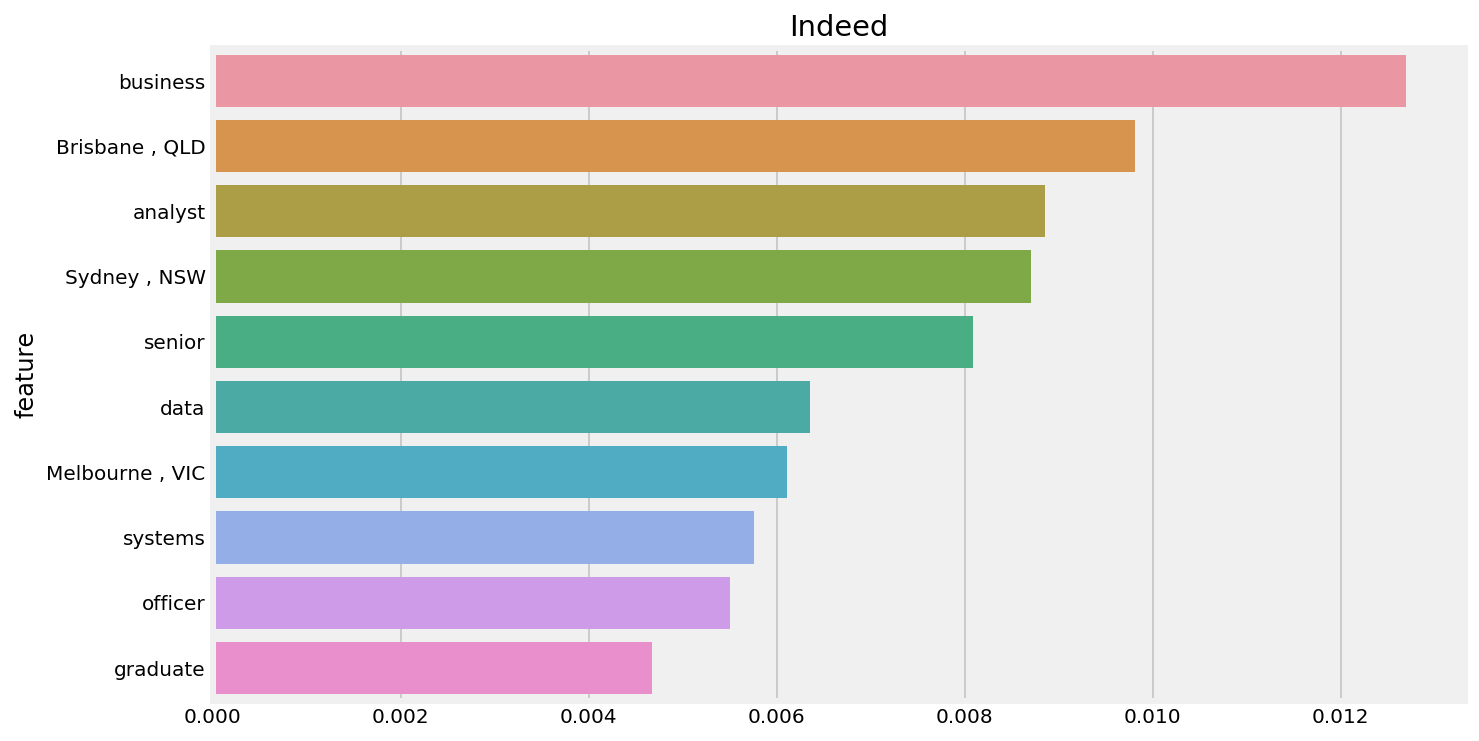

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data = features.sort_values(by = 'importance', ascending = False).T, orient='h')
plt.title("Indeed")
plt.show()

## Test the accuracy on the other models

In [39]:

def classify(classifiers):
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split, cross_val_score
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    if classifiers == 'LogisticRegression':
        # Fitting Logistic Regression to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 59)
        classifier.fit(X_train, y_train)
    
    if classifiers == 'knn':
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)

    if classifiers == 'svm':
        # Fitting SVM to the Training set
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear', random_state = 59)
        classifier.fit(X_train, y_train)
     
    if classifiers == 'nb':
        # Fitting Naive Bayes to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        
    if classifiers == 'Random Forest':
        # Fitting Random Forest to the Training set
        classifier = RandomForestClassifier(500, random_state=59)
        classifier.fit(X_train, y_train)   
            
    if classifiers == 'DecisionTreeClassifier':
        # Fitting DecisionTreeClassifier to the Training set
        classifier = DecisionTreeClassifier(random_state=59)
        classifier.fit(X_train, y_train)
    
    if classifiers == 'ExtraTreesClassifier':
        # Fitting ExtraTreesClassifier to the Training set
        classifier = ExtraTreesClassifier(500, random_state=59)
        classifier.fit(X_train, y_train)

    if classifiers == 'AdaBoostClassifier':
        # Fitting Logistic Regression to the Training set
        classifier = AdaBoostClassifier(random_state=59)
        classifier.fit(X_train, y_train)
        
    if classifiers == 'GradientBoostingClassifier':
        # Fitting GradientBoostingClassifier to the Training set
        classifier = GradientBoostingClassifier(random_state=59)
        classifier.fit(X_train, y_train)
    
    if classifiers == 'pca':
        # Applying PCA
        from sklearn.decomposition import PCA
        pca = PCA(n_components = 2)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        explained_variance = pca.explained_variance_ratio_

        # Fitting Logistic Regression to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 59)
        classifier.fit(X_train, y_train)
    
    if classifiers == 'lda':
        # Applying LDA
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
        lda = LDA(n_components = 2)
        X_train = lda.fit_transform(X_train, y_train)
        X_test = lda.transform(X_test)

        # Fitting Logistic Regression to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 59)
        classifier.fit(X_train, y_train)

    
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy Score:", acc.round(3))
    s = cross_val_score(classifier, X, y, cv=10, n_jobs=-1)
    print("Cross Validation Score:\t{:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))
    
    
    

In [94]:
y.shape

(728,)

In [40]:
classify('LogisticRegression')

[[44 24]
 [29 85]]
Accuracy Score: 0.709
Cross Validation Score:	0.738 ± 0.049


In [41]:
classify('nb')

[[38 30]
 [30 84]]
Accuracy Score: 0.67
Cross Validation Score:	0.651 ± 0.092


In [42]:
classify('Random Forest')

[[ 30  38]
 [ 13 101]]
Accuracy Score: 0.72
Cross Validation Score:	0.728 ± 0.039


In [43]:
classify('knn')

[[52 16]
 [75 39]]
Accuracy Score: 0.5
Cross Validation Score:	0.629 ± 0.056


In [44]:
classify('svm')

[[40 28]
 [35 79]]
Accuracy Score: 0.654
Cross Validation Score:	0.725 ± 0.033


In [67]:
#PCA with Logistic regression
classify('pca')

[[  9  59]
 [  7 107]]
Accuracy Score: 0.637
Cross Validation Score:	0.738 ± 0.049


In [68]:
#LDA with Logistic regression
classify('lda')

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[[44 24]
 [34 80]]
Accuracy Score: 0.681
Cross Validation Score:	0.738 ± 0.049


In [46]:
classify('ExtraTreesClassifier')

[[34 34]
 [15 99]]
Accuracy Score: 0.731
Cross Validation Score:	0.747 ± 0.062


In [47]:
classify('AdaBoostClassifier')

[[30 38]
 [15 99]]
Accuracy Score: 0.709
Cross Validation Score:	0.691 ± 0.066


In [48]:
classify('GradientBoostingClassifier')

[[ 31  37]
 [  8 106]]
Accuracy Score: 0.753
Cross Validation Score:	0.747 ± 0.042


In [49]:
classify('DecisionTreeClassifier')

[[35 33]
 [29 85]]
Accuracy Score: 0.659
Cross Validation Score:	0.658 ± 0.049


In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
    
    
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 59)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
    
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
    
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc.round(3))
s = cross_val_score(classifier, X, y, cv=10, n_jobs=-1)
print("Cross Validation Score:\t{:0.3} ± {:0.3}".format(s.mean().round(3), s.std().round(3)))  

[[44 24]
 [29 85]]
Accuracy Score: 0.709
Cross Validation Score:	0.738 ± 0.049


In [51]:
coeffs = pd.DataFrame(classifier.coef_, columns=X.columns)
coeffs_t = coeffs.transpose()
coeffs_t.columns = ['lasso_coefs']
coeffs_abs = coeffs_t.abs().sort_values('lasso_coefs', ascending=False)
coeffs_abs.iloc[0:10]

,lasso_coefs
data,0.871261
systems,0.692934
senior,0.644030
"Canberra , ACT",0.621646
delivery,0.615736
"Perth , WA",0.607529
junior,0.604040
"Macquarie University , NSW",0.593800
developer,0.573888
business,0.502759


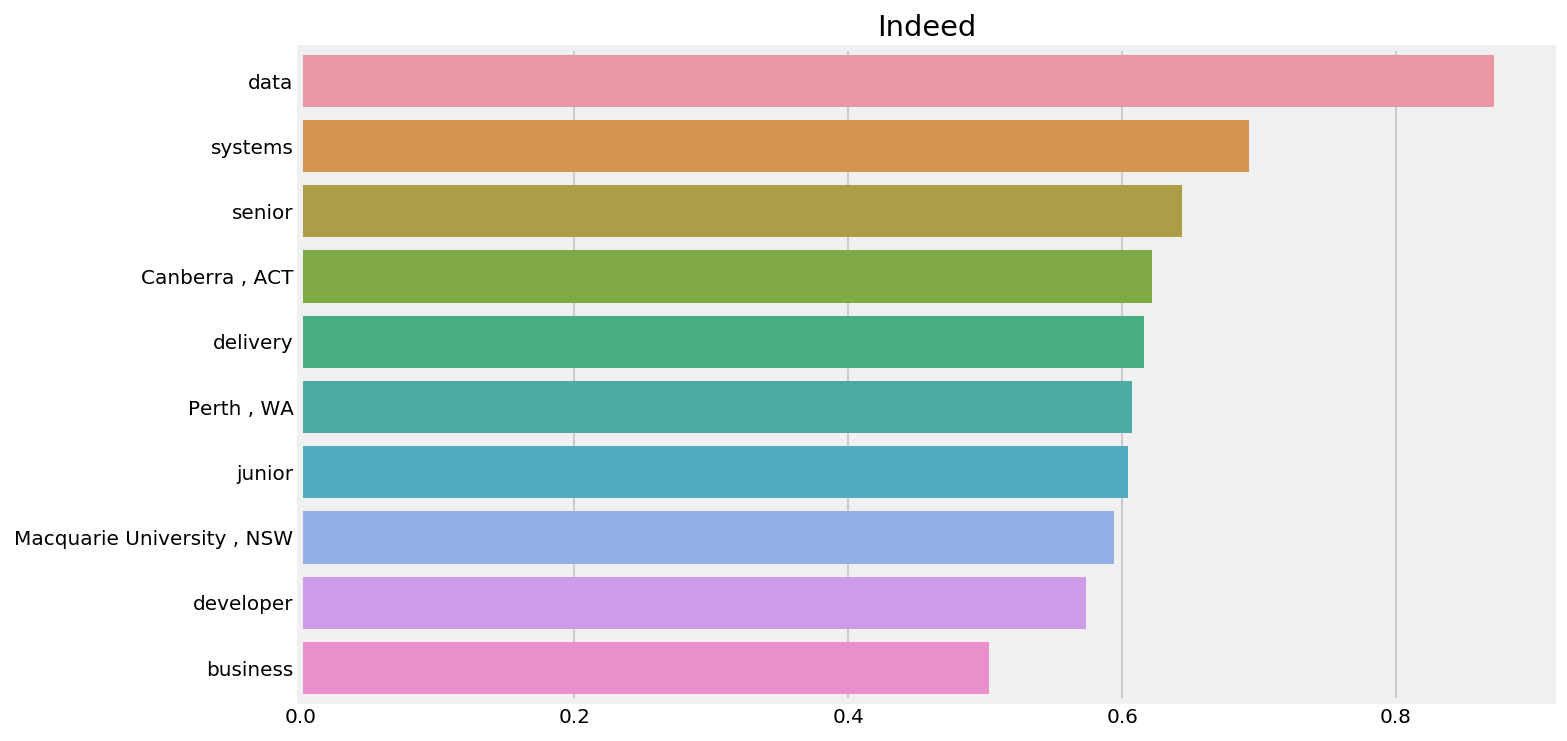

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(data = coeffs_abs.iloc[0:10].sort_values(by = 'lasso_coefs', ascending = False).T, orient='h')
plt.title("Indeed")
plt.show()